### Covariance :

Covariance measures how two variables vary in tandem from their means.

For example: lets say we an e-commerce company is interested in finding a correlation between page-speed and customer spending.

Numpy offers covariation methods, but lets do it the hard way to see what happens under the hood. Basically we treat each vatiable as a vector of deviation from the mean and compute the "dot product" of both vectors. Gemetrically this can be hard as the angle between the two vectors in a high-demensional space, but one can just think of it as a measure of similarities between the two variables.

First, lets just make speed and purchase totally ramdom and independent of each other, one sould find very small covariance in the results.



Convariance: -0.14389117526816747


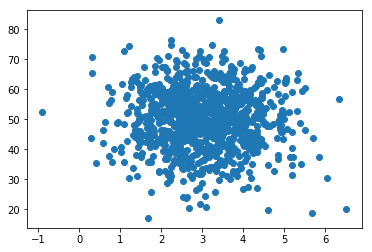

In [6]:
import numpy as np               # mean function
import scipy as sp               # dot, ramdom, norm functions
import matplotlib.pyplot as plt  # plotting 


def de_mean(x):
    xmean = sp.mean(x)
    return [xi - xmean for xi in x]

def covariance (x, y):
    n = len(x)
    return np.dot(de_mean(x), de_mean(y))/ (n-1)

pageSpeed = np.random.normal(3.0, 1.0, 1000)
purchaseAmount = np.random.normal(50.0, 10.0, 1000)

plt.scatter(pageSpeed, purchaseAmount)

print('Convariance: ' + str(covariance (pageSpeed,purchaseAmount)))

Now, lets make the purchase anount an actual function of the page speed, that should make a very real correlation between the two. The far from zero (negative value in this case) indicates an inverse relationship:

Important thing to remember: correlation doesn't imply causation. Only a controlled, ramdomised experiment can give meaningful insight on caustion

-9.793673476362736

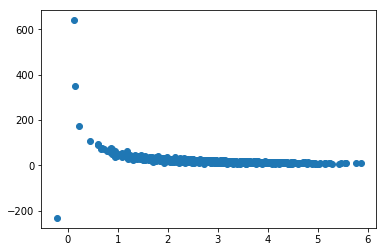

In [2]:
purchaseAmount = np.random.normal(50.0,10.0,1000)/ pageSpeed # 

plt.scatter(pageSpeed, purchaseAmount)

covariance(pageSpeed, purchaseAmount)

### Correlation 
It's pretty obvious from the last two outputs that the closer the result is to zero, the  less the covariance between the two variables, however, what does it mean close or far from zero ? and how far is far or how close is close?

This is where correlation comes handy. lets write the function to calculate correlation:

In [3]:
def correlation(x, y):
    stddev_x = x.std()
    stddev_y = y.std()
    return covariance(x,y) / stddev_x / stddev_y 

correlation(pageSpeed, purchaseAmount)
    

-0.38818645705999244

Numoy can also calculate the correlation with numpy.corrcoef function. It returns a matrix of the correlation between every combination of the arrays passed into it: 

In [4]:
np.corrcoef(pageSpeed,purchaseAmount) 

array([[ 1.        , -0.38779827],
       [-0.38779827,  1.        ]])

This outout above is the return array from the function np.corrcoef(). It's actually computing all combinations between the data passed in: so, the first(0th) index is '1' which means the pageSpeed is in perfect correlation with itself, the second index is in negative which means the variable pageSpeed and purchaseAmount is in inverse correlation (I set it that way) the last or the 3rd inded again says '1' means it's in perfect correlation with itself. 

## Perfect correlation



-1.001001001001001

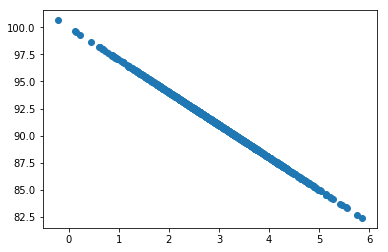

In [5]:
purchaseAmount = 100 - pageSpeed * 3   # perfect negative correlation
plt.scatter(pageSpeed,purchaseAmount)
correlation(pageSpeed,purchaseAmount)